In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

from class_format_data import FormatData

In [2]:
format_data = FormatData()

# Análise exploratória dos dados de treino

In [3]:
format_data.format_raw_data("test_FD001.txt")

df_test = format_data.get_format_data("test_FD001.txt")

In [4]:
df_test

,unit_number,time,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1.0,1.0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735
1,1.0,2.0,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916
2,1.0,3.0,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166
3,1.0,4.0,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737
4,1.0,5.0,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100.0,194.0,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394.0,2388.0,100.0,38.65,23.1974
13092,100.0,195.0,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395.0,2388.0,100.0,38.57,23.2771
13093,100.0,196.0,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395.0,2388.0,100.0,38.62,23.2051
13094,100.0,197.0,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395.0,2388.0,100.0,38.66,23.2699


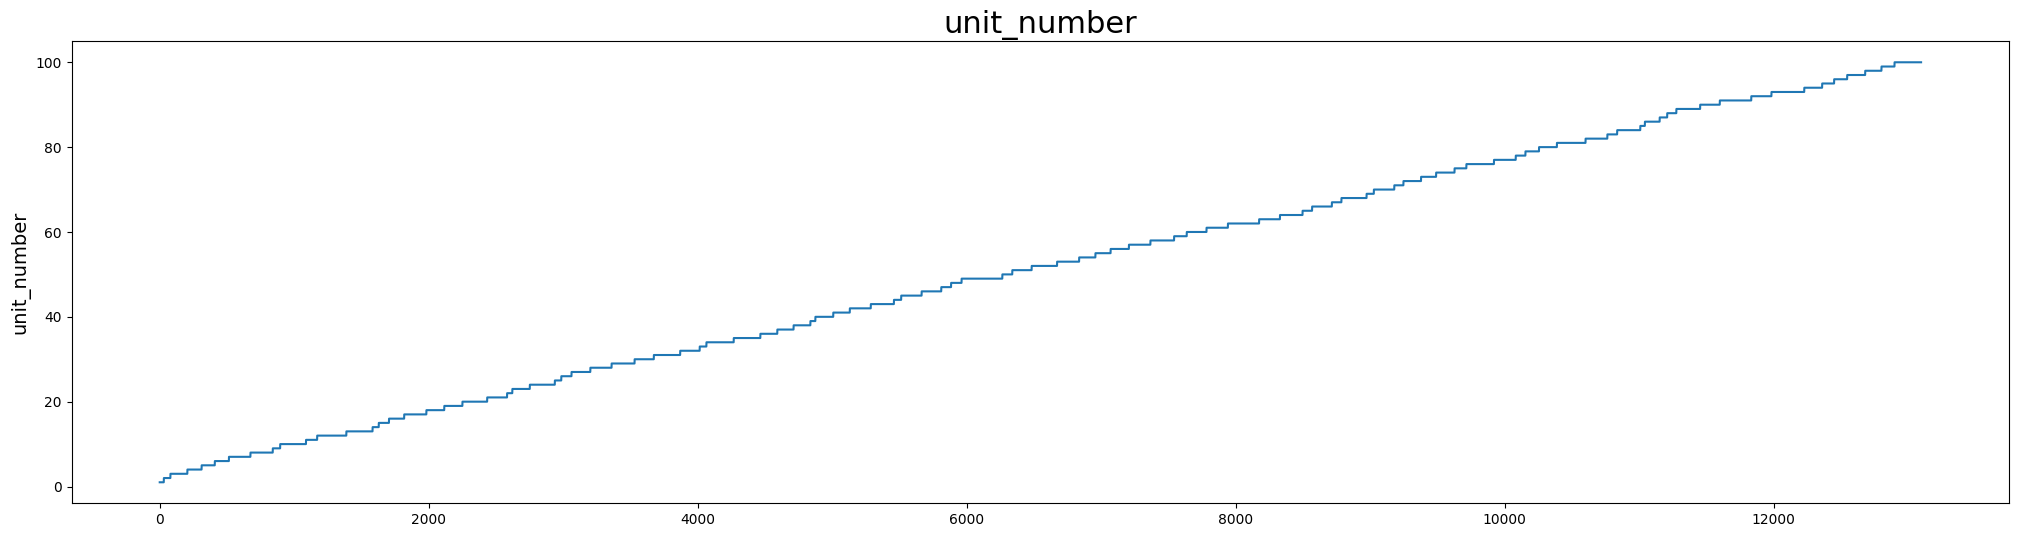

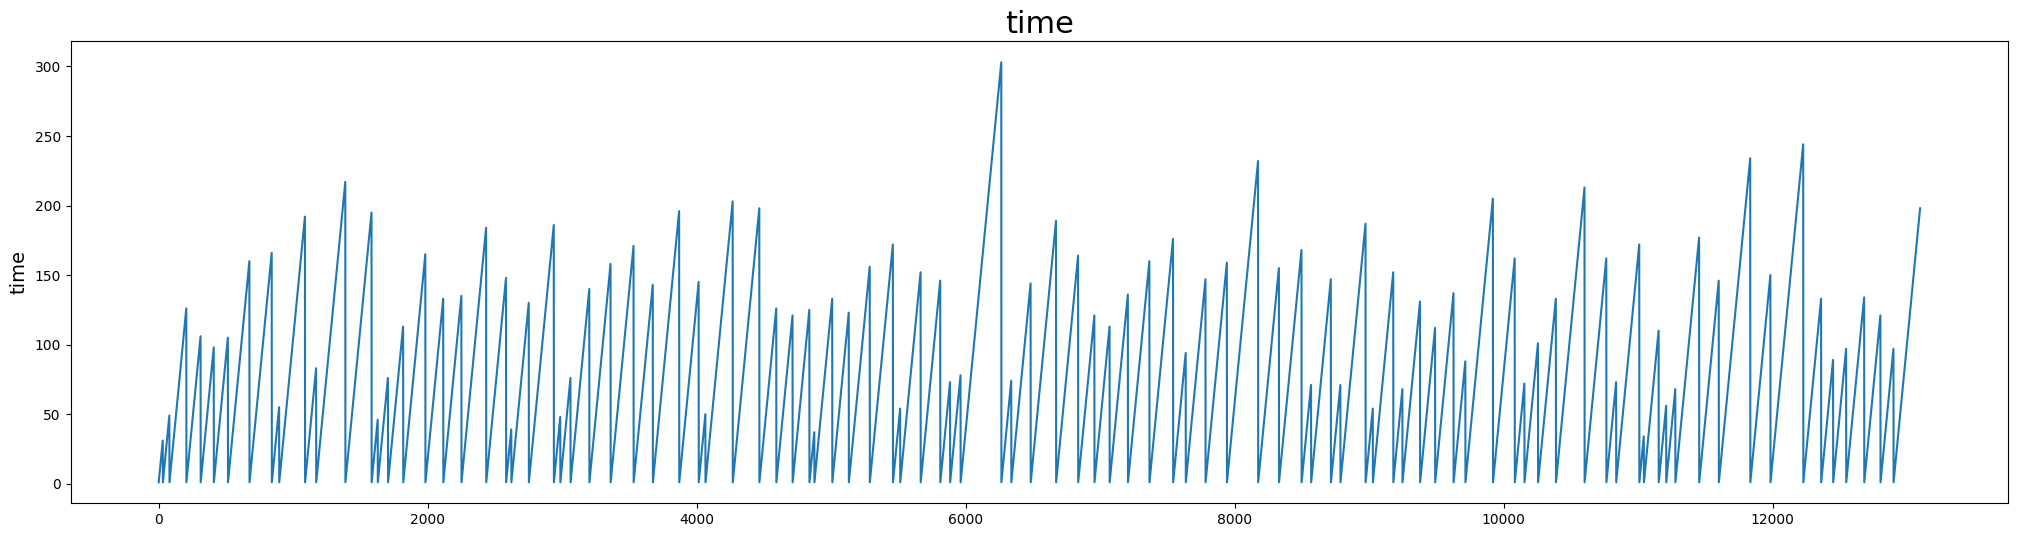

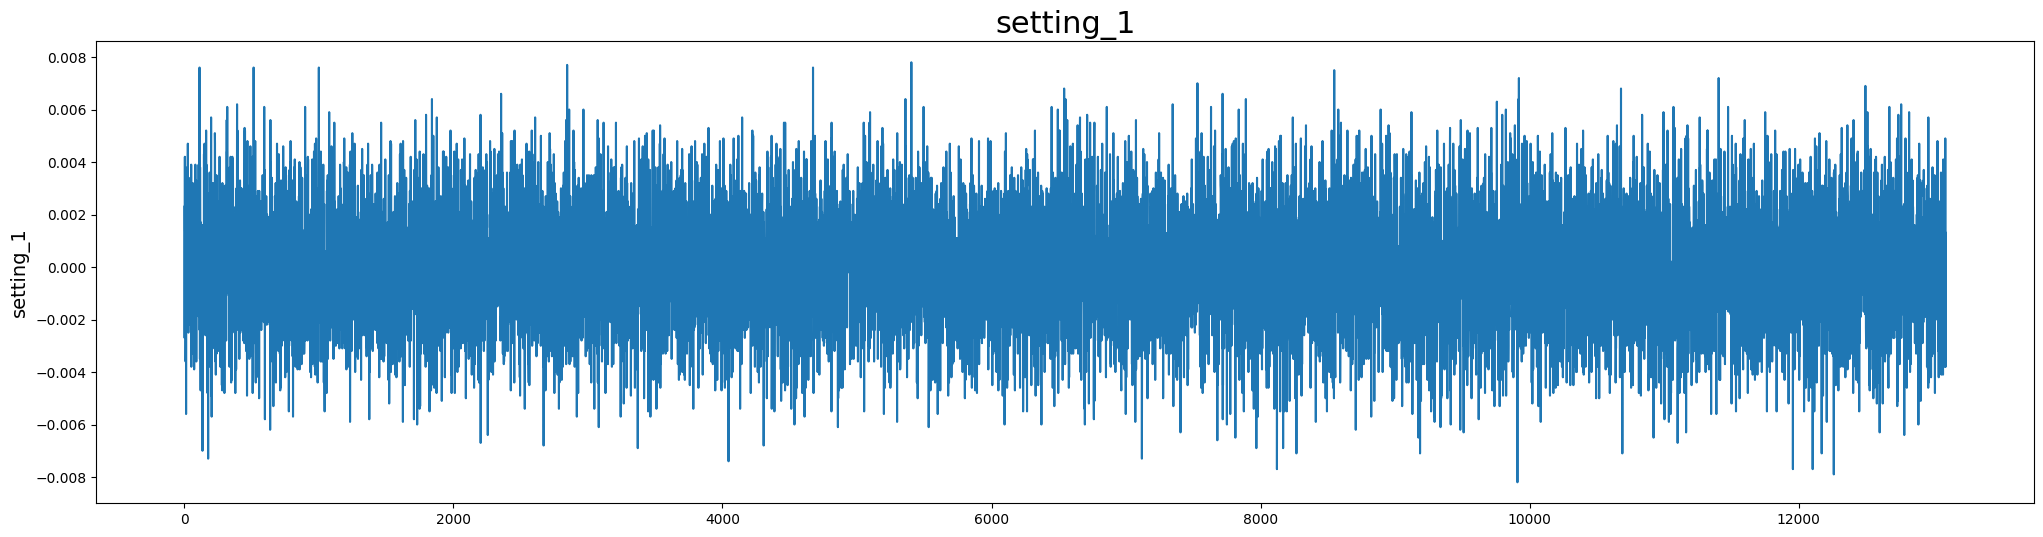

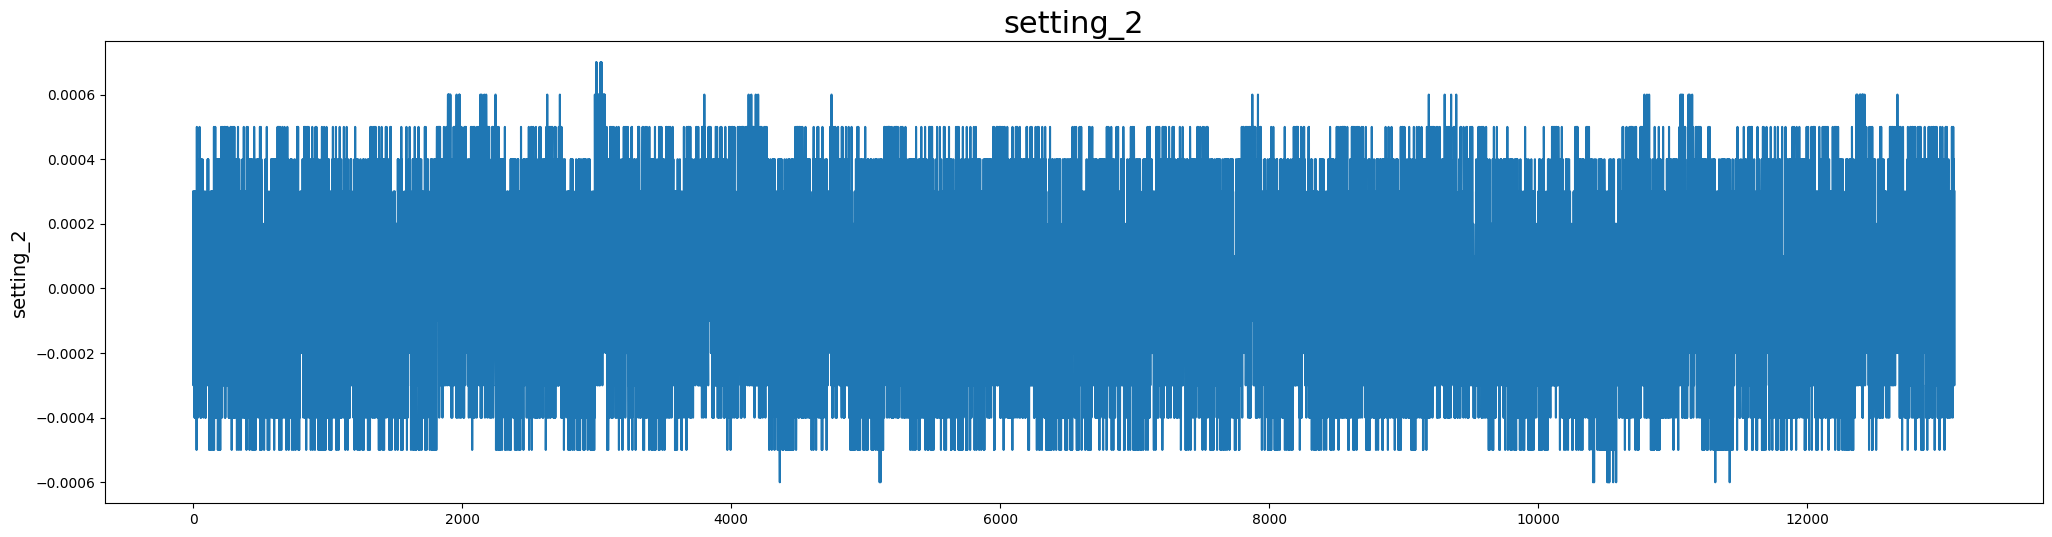

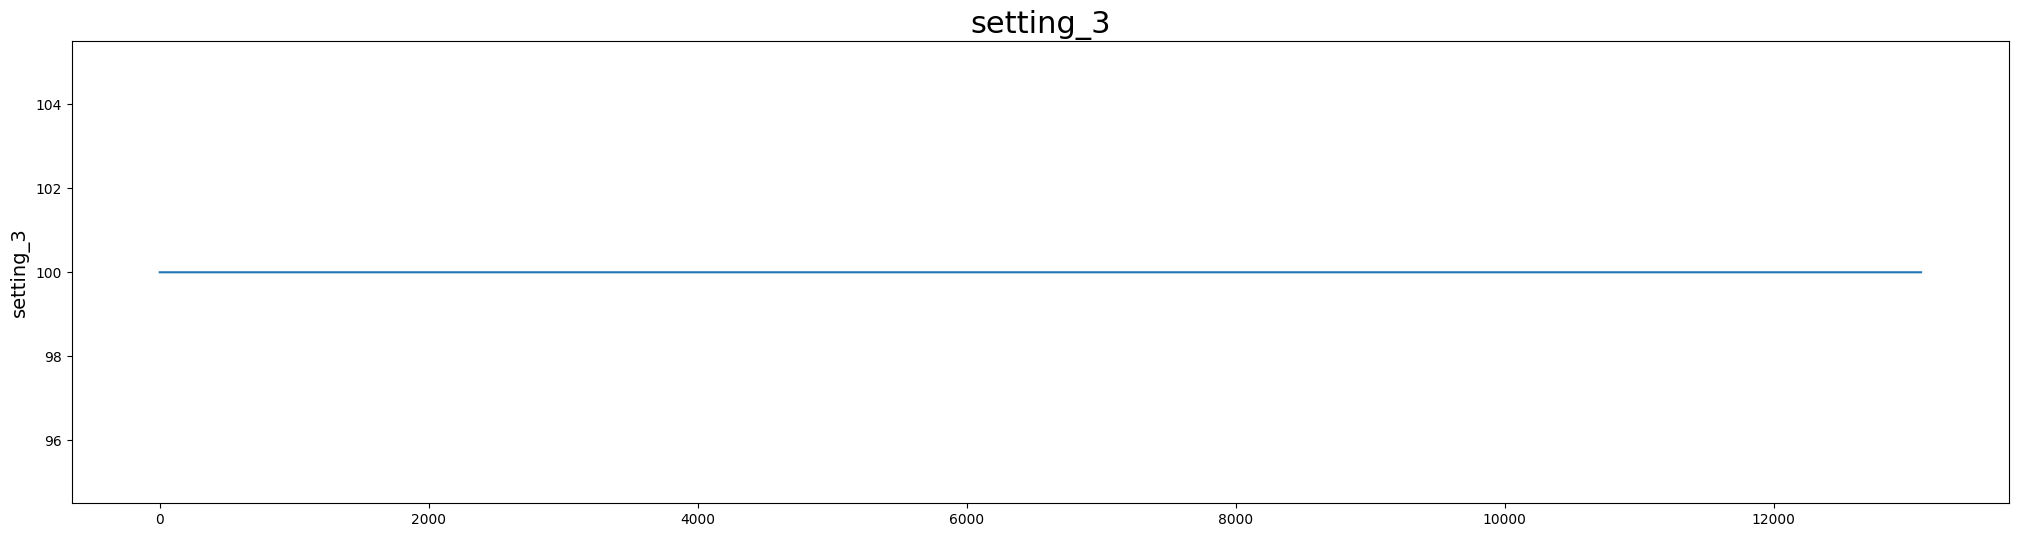

In [5]:
i = 0
for column in df_test.columns:
    fig, ax = plt.subplots(figsize=(25, 6))
    ax.plot(df_test[column])
    ax.set_ylabel(column, fontsize=14)
    ax.set_title(column, fontsize=22)
    i = i + 1
    if i == 5:
        break

Pode-se observar que há sensores que estão flat, ou seja, estão com valor fixo durante todo tempo. Esses sensores deverão ser removidos. Para identifica-los, será usado a variância. Se um sensor tiver uma variância muito pequena, ele será considerado como flat.

In [6]:
df_test["sensor_16"].var()

1.0834183226673213e-34

In [7]:
good_sensor = list(df_test.columns)
for sensor in df_test.columns:
    if df_test[sensor].var() <= 0.00000001:
        print("Sensor is flat:", sensor)
        good_sensor.remove(sensor)

Sensor is flat: setting_3
Sensor is flat: sensor_1
Sensor is flat: sensor_5
Sensor is flat: sensor_10
Sensor is flat: sensor_16
Sensor is flat: sensor_18
Sensor is flat: sensor_19


In [8]:
df_test = df_test[good_sensor]
df_test

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1.0,1.0,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392.0,38.86,23.3735
1,1.0,2.0,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393.0,39.02,23.3916
2,1.0,3.0,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393.0,39.08,23.4166
3,1.0,4.0,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391.0,39.00,23.3737
4,1.0,5.0,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100.0,194.0,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394.0,38.65,23.1974
13092,100.0,195.0,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395.0,38.57,23.2771
13093,100.0,196.0,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395.0,38.62,23.2051
13094,100.0,197.0,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395.0,38.66,23.2699


In [9]:
df_test

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1.0,1.0,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392.0,38.86,23.3735
1,1.0,2.0,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393.0,39.02,23.3916
2,1.0,3.0,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393.0,39.08,23.4166
3,1.0,4.0,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391.0,39.00,23.3737
4,1.0,5.0,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100.0,194.0,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394.0,38.65,23.1974
13092,100.0,195.0,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395.0,38.57,23.2771
13093,100.0,196.0,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395.0,38.62,23.2051
13094,100.0,197.0,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395.0,38.66,23.2699


## Criação da feature RUL (Remaining  Useful  Life)

In [11]:
rul = pd.DataFrame(df_test.groupby('unit_number')['time'].max()).reset_index()
rul.columns = ['id', 'max']
rul

,id,max
0,1.0,31.0
1,2.0,49.0
2,3.0,126.0
3,4.0,106.0
4,5.0,98.0
...,...,...
95,96.0,97.0
96,97.0,134.0
97,98.0,121.0
98,99.0,97.0


In [13]:
df_rul = format_data.read_txt_rul('RUL_FD001.txt')
df_rul

,max,unit_number
0,112.0,1
1,98.0,2
2,69.0,3
3,82.0,4
4,91.0,5
...,...,...
95,137.0,96
96,82.0,97
97,59.0,98
98,117.0,99


In [14]:
df_rul['rtf']=rul['max']+df_rul['max']
df_rul

,max,unit_number,rtf
0,112.0,1,143.0
1,98.0,2,147.0
2,69.0,3,195.0
3,82.0,4,188.0
4,91.0,5,189.0
...,...,...,...
95,137.0,96,234.0
96,82.0,97,216.0
97,59.0,98,180.0
98,117.0,99,214.0


In [18]:
df_rul = df_rul.drop(columns=["max"])

In [22]:
df_test = df_test.merge(df_rul,on=['unit_number'],how='left')
df_test['RUL'] = df_test['rtf'] - df_test['time']
df_test.drop('rtf', axis=1, inplace=True)
df_test

,unit_number,time,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1.0,1.0,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392.0,38.86,23.3735,142.0
1,1.0,2.0,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393.0,39.02,23.3916,141.0
2,1.0,3.0,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393.0,39.08,23.4166,140.0
3,1.0,4.0,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391.0,39.00,23.3737,139.0
4,1.0,5.0,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390.0,38.99,23.4130,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100.0,194.0,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394.0,38.65,23.1974,24.0
13092,100.0,195.0,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395.0,38.57,23.2771,23.0
13093,100.0,196.0,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395.0,38.62,23.2051,22.0
13094,100.0,197.0,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395.0,38.66,23.2699,21.0


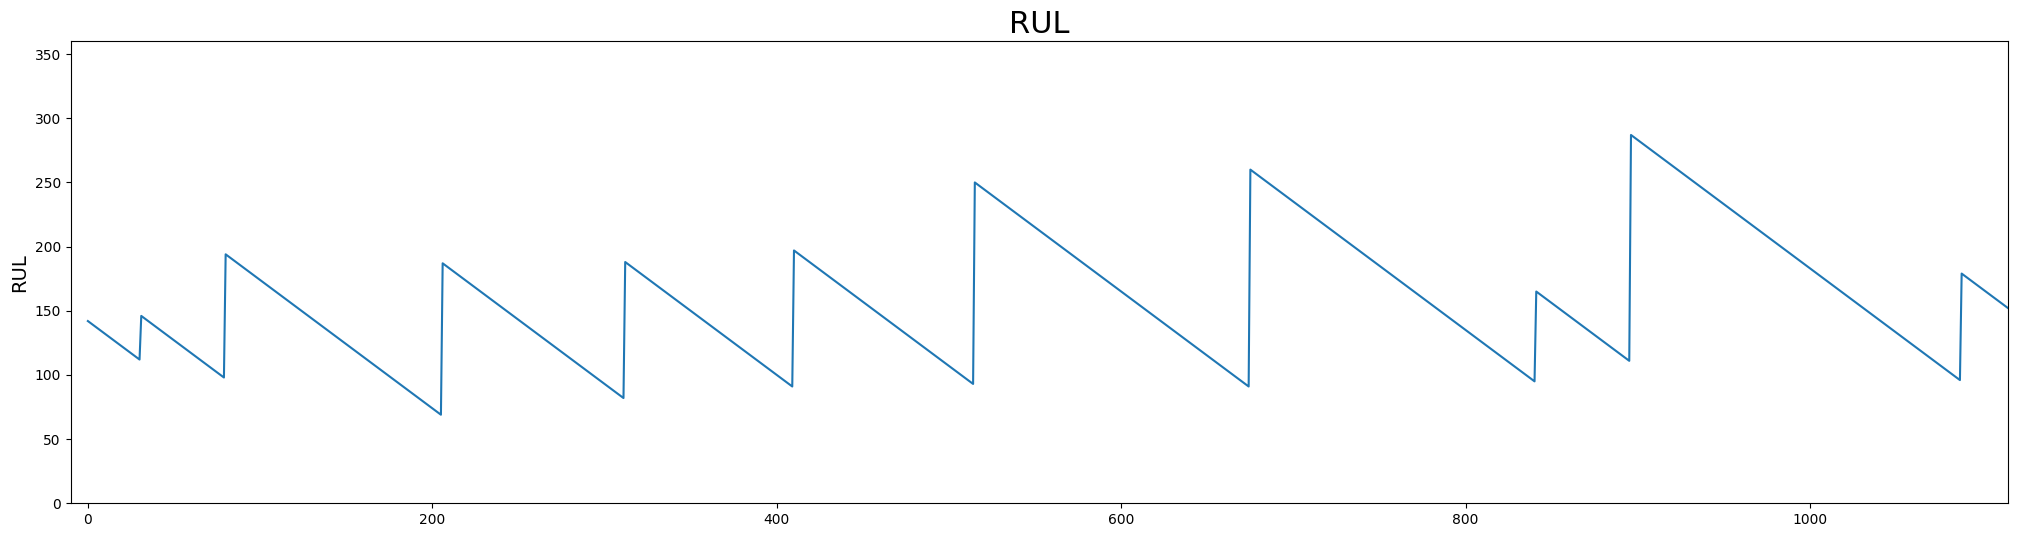

In [23]:
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(df_test.index.values, df_test["RUL"].values)
ax.set_ylabel("RUL", fontsize=14)
ax.set_title("RUL", fontsize=22)
ax.set_xlim(-10,1115)
ax.set_ylim(0,360)
plt.show()

Pode observar que a vida restante do turbofan começa com valor elevado e vai descrescendo ao longo do tempo. Porém, nos dados de teste o RUL não chega igual a zero. Isso acontece pois é feito todo um tratamento com dos dados de teste para se obter o valor verdadeiro do RUL. O que deverá ser feito no processamento para os dados de treino:
- **Remoção dos sensores flat**
- **Cálculo do RUL** (este cálculo é um pouco mais complexo)